In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
predictions = pd.read_csv('/home/alalbiol/tmp/alfonso/predictions.tsv', sep='\t',
                          dtype={'accessionNumber': str, 'condifence': float})
print(predictions.head())
print(predictions.describe())

birads = pd.read_csv('/home/alalbiol/tmp/alfonso/ai_mg_birad.csv', sep=',', 
                      usecols=[0,1,3], dtype={1: str, 0: str})
cols = [c.strip()  for c in birads.columns]
birads.columns = cols


birads.head()



   subjectId  examIndex laterality accessionNumber      date  confidence
0    1009356          1          L         1680192  20240201    0.072196
1    1009356          1          R         1680192  20240201    0.038174
2    1009973          1          L         1678636  20240131    0.244670
3    1009973          1          R         1678636  20240131    0.069748
4    1010144          1          L         1682791  20240207    0.182365
          subjectId    examIndex          date   confidence
count  1.527000e+03  1527.000000  1.527000e+03  1527.000000
mean   1.235937e+06     1.000655  2.023631e+07     0.257637
std    5.862242e+05     0.025591  4.425190e+03     0.184766
min    2.165000e+03     1.000000  2.023113e+07     0.005359
25%    1.043023e+06     1.000000  2.023121e+07     0.113294
50%    1.424928e+06     1.000000  2.024011e+07     0.221134
75%    1.750848e+06     1.000000  2.024012e+07     0.356816
max    1.791282e+06     2.000000  2.024021e+07     0.999108


,PatientID,AccessionNumber,Birads
0,1652004,1645002,2
1,1652004,1645002,2
2,1652004,1645002,2
3,1652004,1645002,2
4,269094,1645223,2


In [118]:
grouped_birads = birads.groupby('AccessionNumber')['Birads'].nunique()
print(grouped_birads[grouped_birads > 1])

birads = birads.groupby('AccessionNumber')['Birads'].mean()

#todos los accesion number tienen el mismo birads!


Series([], Name: Birads, dtype: int64)


In [125]:
predictions['birads'] = predictions['accessionNumber'].apply(lambda X: birads[X] if X in birads else None)

In [126]:
predictions['birads']

0       2.0
1       2.0
2       3.0
3       3.0
4       4.0
       ... 
1522    2.0
1523    2.0
1524    2.0
1525    2.0
1526    2.0
Name: birads, Length: 1527, dtype: float64

In [122]:
len(birads)

785

In [124]:
len(predictions.accessionNumber.unique())

786

In [129]:
print("Birads 1.0: ", len(predictions.loc[predictions['birads'] == 1.0]))
print("Birads 2.0: ", len(predictions.loc[predictions['birads'] == 2.0]))
print("Birads 3.0: ", len(predictions.loc[predictions['birads'] == 3.0]))
print("Birads 4.0: ", len(predictions.loc[predictions['birads'] == 4.0]))



Birads 1.0:  226
Birads 2.0:  953
Birads 3.0:  141
Birads 4.0:  87


<Axes: >

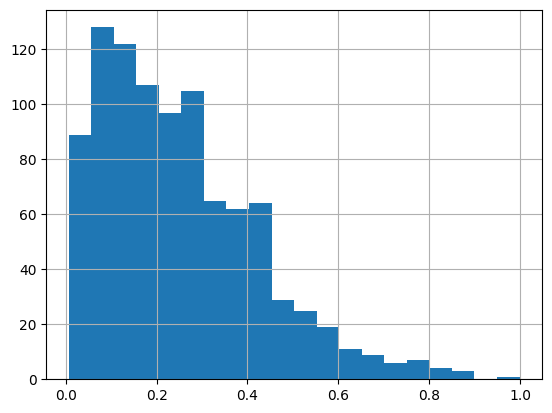

In [136]:
predictions.loc[predictions['birads']==2.0].confidence.hist(bins=20)

<Axes: >

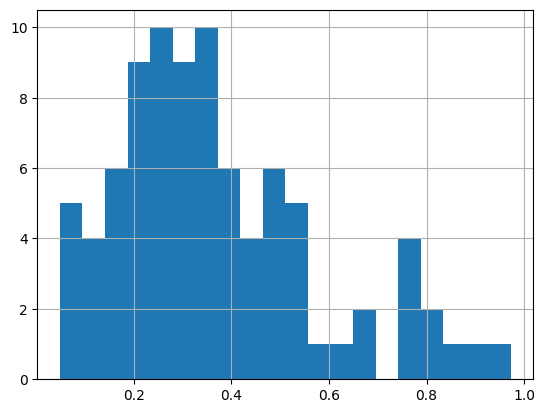

In [137]:
predictions.loc[predictions['birads']==4.0].confidence.hist(bins=20)

In [139]:
print("media birads2 ", predictions.loc[predictions['birads']==2.0].confidence.mean())
print("media birads4 ", predictions.loc[predictions['birads']==4.0].confidence.mean())


media birads2  0.2516749113240294
media birads4  0.3700112302528736


In [143]:
print("number of preciction > 0.7 = ", len(predictions.loc[predictions['confidence'] > 0.5]),"/", len(predictions))

number of preciction > 0.7 =  149 / 1527


In [147]:
predictions_patient = predictions.groupby('accessionNumber').agg({'confidence': 'mean', 'birads': 'max'})

Text(0.5, 0, 'Confidence')

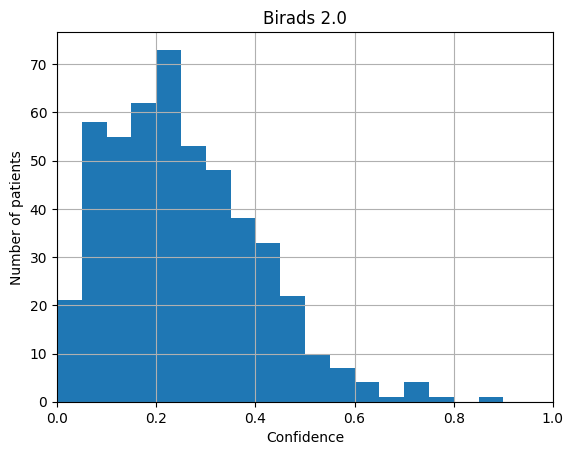

In [157]:
predictions_patient.loc[predictions_patient['birads']==2.0].confidence.hist(bins=np.arange(0,1,0.05))
plt.xlim(0,1)
plt.title('Birads 2.0')
plt.ylabel('Number of patients')
plt.xlabel('Confidence')

Text(0.5, 0, 'Confidence')

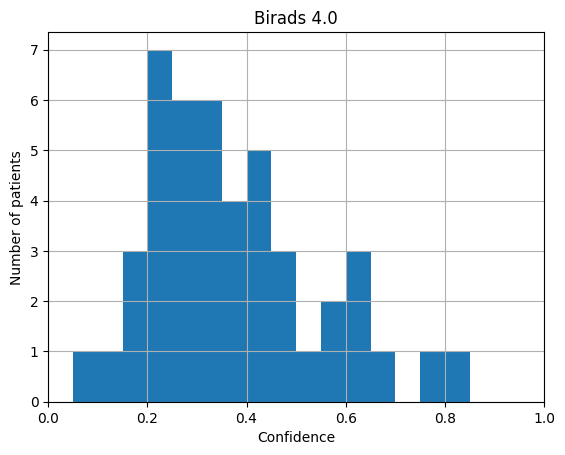

In [159]:
predictions_patient.loc[predictions_patient['birads']==4.0].confidence.hist(bins=np.arange(0,1,0.05))
plt.xlim(0,1)
plt.title('Birads 4.0')
plt.ylabel('Number of patients')
plt.xlabel('Confidence')

In [166]:
196/536

0.3656716417910448

In [164]:
491+45

536

In [162]:
print("num of patients with birads 2.0: ", len(predictions_patient.loc[predictions_patient['birads']==2.0]))
print("num of patients with birads 4.0: ", len(predictions_patient.loc[predictions_patient['birads']==4.0]))
print("num of patients with birads 4.0: ", len(predictions_patient.loc[predictions_patient['birads'].isnull()]))


num of patients:  786
num of patients with birads 2.0:  491
num of patients with birads 4.0:  45
num of patients with birads 4.0:  1


In [165]:
print("num of patients with birads 2.0 y confidence<0.2: ", len(predictions_patient.loc[(predictions_patient['birads']==2.0) & (predictions_patient['confidence'] < 0.2)]))
print("num of patients with birads 4.0 y confidence<0.2: ", len(predictions_patient.loc[(predictions_patient['birads']==4.0) & (predictions_patient['confidence'] < 0.2)]))


num of patients with birads 2.0 y confidence<0.2:  196
num of patients with birads 4.0 y confidence<0.2:  5


In [167]:
predictions_patient.loc[(predictions_patient['birads']==4.0) & (predictions_patient['confidence'] < 0.2)]

,confidence,birads
accessionNumber,,
1655176,0.184840,4.0
1656944,0.053334,4.0
1669024,0.115920,4.0
1679681,0.181506,4.0
1681776,0.154987,4.0


In [171]:
predictions_patient.loc[(predictions_patient['birads']==2.0) & (predictions_patient['confidence'] > 0.7)]

,confidence,birads
accessionNumber,,
1646388,0.712268,2.0
1651280,0.732072,2.0
1653312,0.781635,2.0
1654793,0.709396,2.0
1658055,0.705214,2.0
1665073,0.863212,2.0
